In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# See through dataset

In [2]:
df = pd.read_csv("Breast_cancer_data.csv")

In [3]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
df.shape

(569, 6)

In [5]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


# Data visualization

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

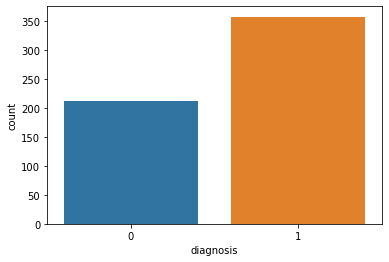

In [7]:
sns.countplot(df.diagnosis)

1. there are 212 data that belongs to class 0
2. there are 357 data that belongs to class 1

<AxesSubplot:xlabel='mean_radius', ylabel='mean_texture'>

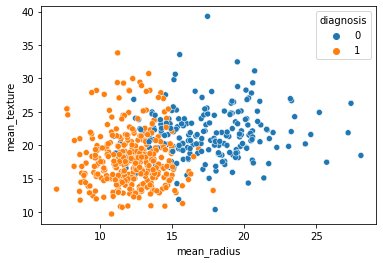

In [8]:
sns.scatterplot(df.mean_radius, df.mean_texture, hue = df.diagnosis)

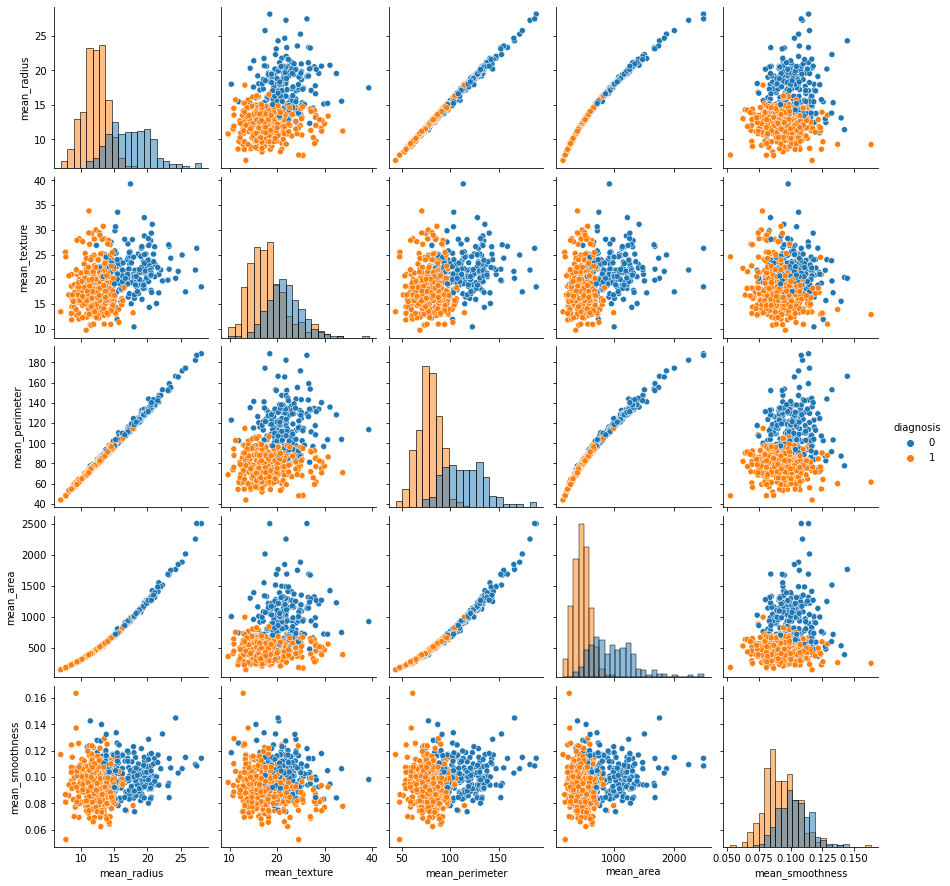

In [9]:
sns.pairplot(df, hue ="diagnosis", diag_kind="hist")

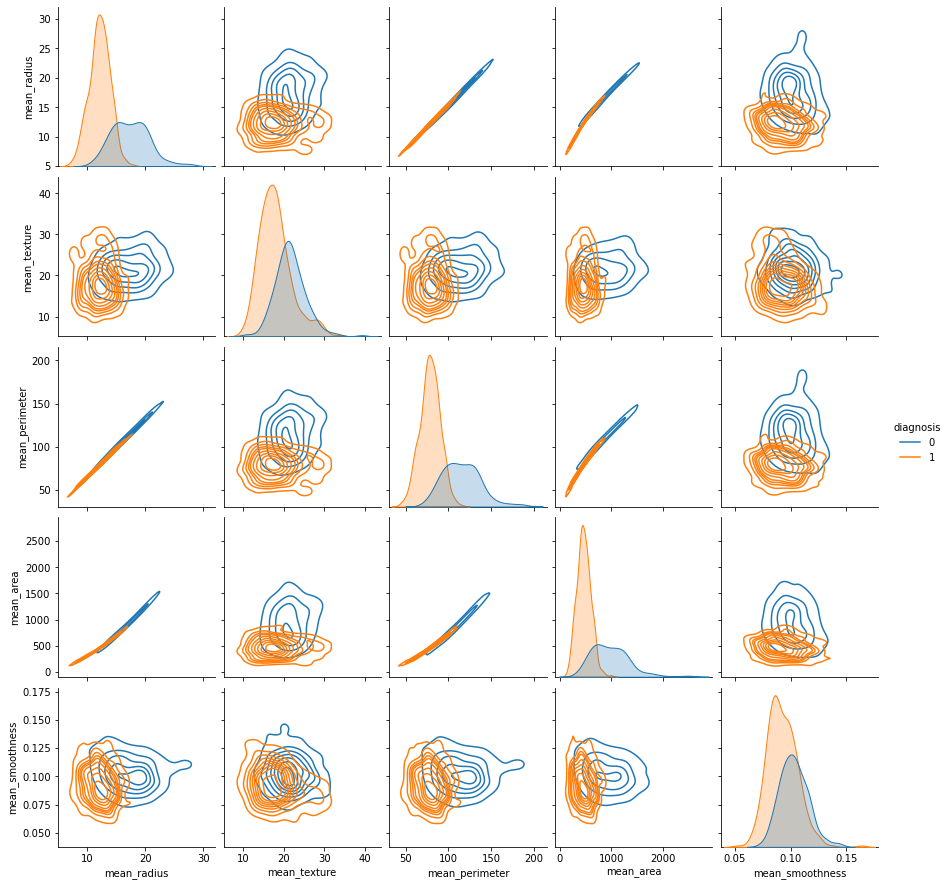

In [10]:
sns.pairplot(df, hue ="diagnosis", kind="kde")

<AxesSubplot:>

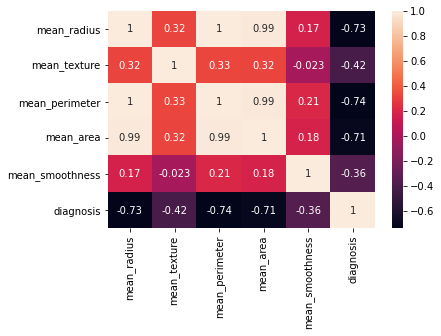

In [11]:
sns.heatmap(df.corr(), annot = True)

1. This shows correlation of each variable with each other
2. all the input features are negatively correlated to output variable

<AxesSubplot:>

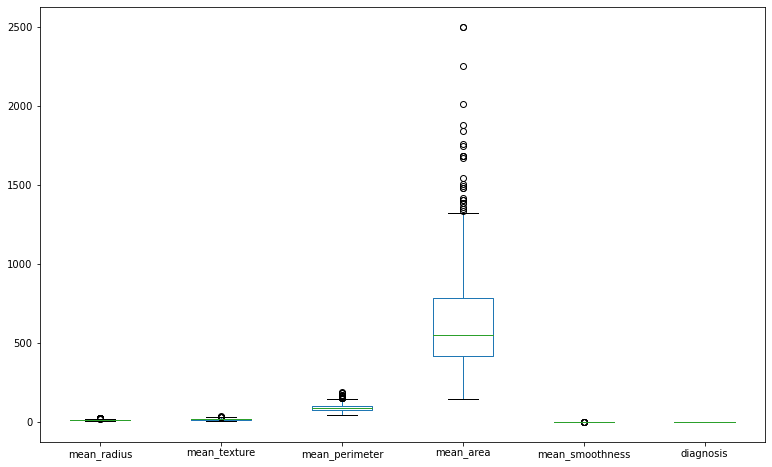

In [12]:
df.plot(kind = "box", sharex = False, sharey = False, figsize = (13, 8))

1. there are some outliers in mean_area column
2. we'll remove these outliers from dataset

# Outlier removing using inter quartile range

In [13]:
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - IQR * 1.5
    upper_limit = Q3 + IQR * 1.5
    return lower_limit, upper_limit

In [14]:
lower_limit, upper_limit = remove_outliers(df, "mean_area")
df['mean_area'] = np.where(df['mean_area'] > upper_limit, upper_limit, df['mean_area'])
df['mean_area'] = np.where(df['mean_area'] < lower_limit, lower_limit, df['mean_area'])

df.plot(kind = "box", sharex = False, sharey = False, figsize = (13, 8))

We can see that there is no outliers in the datasets

# input features and output feature selection

In [16]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# splitting dataset into train and test

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
LR = LogisticRegression()

In [21]:
model = LR.fit(X_train, y_train)

In [22]:
pred = model.predict(X_test)

In [23]:
pred[:10]

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score, classification_report

In [25]:
print("Accuracy Score: ", accuracy_score(y_test, pred)*100, "%")

Accuracy Score:  92.10526315789474 %


In [26]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88        40
           1       0.91      0.97      0.94        74

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



# Hyperparameter tuning

In [27]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [0.8, 0.9, 1.0, 1.2, 1.4],
    'solver': ['newton-cg','lbfgs', 'liblinear','sag', 'saga']
}
LR = LogisticRegression()
clf = GridSearchCV(LR, parameters)
clf.fit(X, y)
clf.best_params_

{'C': 0.8, 'penalty': 'none', 'solver': 'lbfgs'}

In [28]:
LR = LogisticRegression(C = 0.8, penalty = 'none', solver = 'lbfgs')
model = LR.fit(X_train, y_train)
pred = model.predict(X_test)
pred[:10]

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [29]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        40
           1       0.93      1.00      0.96        74

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [30]:
print("Accuracy Score: ", accuracy_score(y_test, pred)*100, "%")

Accuracy Score:  94.73684210526315 %


In [ ]:
#git remote add origin